In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pandas.conftest import index
from sklearn.cluster import KMeans
import sys
import os

In [2]:
data_file = "RGB_colors.csv"
df_colors = pandas.read_csv(data_file)

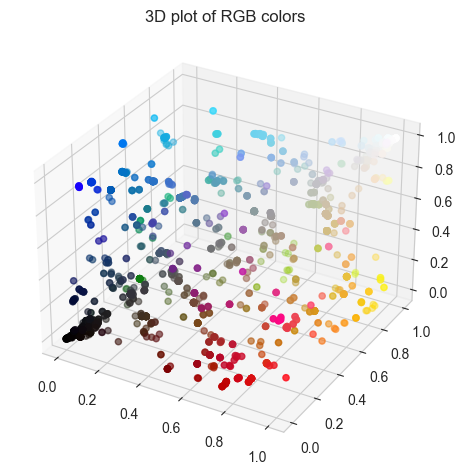

In [3]:
colors = np.array(df_colors.values)/255 

x_comp = colors[:,0]
y_comp = colors[:,1]
z_comp = colors[:,2]
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x_comp, y_comp, z_comp, c=colors)
plt.title('3D plot of RGB colors')
plt.tight_layout()
plt.show()

In [4]:
n_clusters = 10
random_state = 1234

X = np.array(df_colors.values)

def fit_kmeans(X, n_clusters, random_state):
  model = KMeans(n_clusters=n_clusters, random_state=random_state).fit(X)
  return model

KMeans_model = fit_kmeans(X, n_clusters, random_state)

predictions = KMeans_model.predict(X)

df_colors['cluster'] = predictions

Cluster counts: cluster
1    398
0    338
2    319
5    234
3    176
9    135
7    128
4    119
6     97
8     86
Name: count, dtype: int64


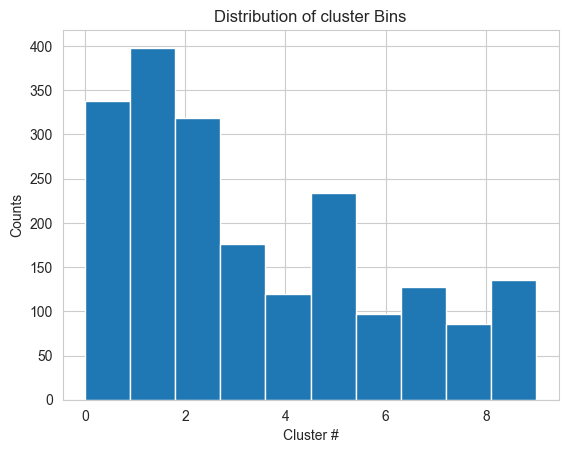

In [5]:
print(f'Cluster counts: {df_colors["cluster"].value_counts()}')
plt.hist(df_colors['cluster'],bins=10)
plt.title('Distribution of cluster Bins')
plt.ylabel('Counts')
plt.xlabel('Cluster #')
plt.show()

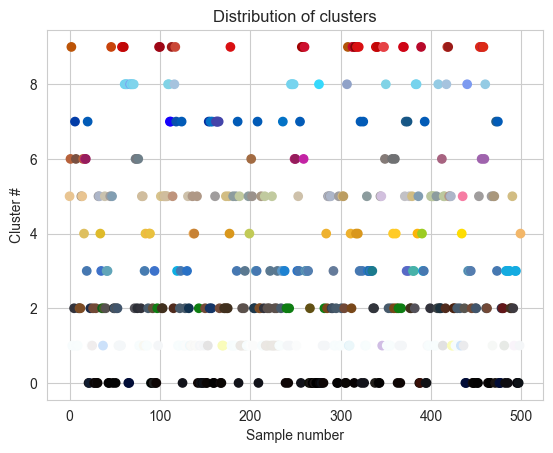

In [6]:
mini_colors = colors[:500]

plt.scatter(df_colors[:500].index,df_colors['cluster'][:500],c=mini_colors)
plt.title('Distribution of clusters')
plt.ylabel('Cluster #')
plt.xlabel('Sample number')
plt.show()

In [7]:
centroids = KMeans_model.cluster_centers_

In [8]:
import math

# web color values/names from https://en.wikipedia.org/wiki/Web_colors
color_names = {
    "MediumVioletRed": [199, 21, 133],
    "DeepPink": [255, 20, 147],
    "PaleVioletRed": [219, 112, 147],
    "HotPink": [255, 105, 180],
    "LightPink": [255, 182, 193],
    "Pink": [255, 192, 203],
    "DarkRed": [139, 0, 0],
    "Red": [255, 0, 0],
    "Firebrick": [178, 34, 34],
    "Crimson": [220, 20, 60],
    "IndianRed": [ 205, 92, 92],
    "LightCoral": [240, 128, 128],
    "Salmon": [250, 128, 114],
    "DarkSalmon": [233, 150, 122],
    "LightSalmon": [255, 160, 122],
    "OrangeRed": [255, 69, 0],
    "Tomato": [255, 99, 71],
    "DarkOrange": [255, 140, 0],
    "Coral": [255, 127, 80],
    "Orange": [255, 165, 0],
    "DarkKhaki": [189, 183, 107],
    "Gold": [255, 215, 0],
    "Khaki": [240, 230, 140],
    "PeachPuff": [255, 218, 185],
    "Yellow": [255, 255, 0],
    "PaleGoldenrod": [238, 232, 170],
    "Moccasin": [255, 228, 181],
    "PapayaWhip": [255, 239, 213],
    "LightGoldenrodYellow": [250, 250, 210],
    "LemonChiffon": [255, 250, 205],
    "LightYellow": [255, 255, 224],
    "Maroon": [128, 0, 0],
    "Brown": [165, 42, 42],
    "SaddleBrown": [139, 69, 19],
    "Sienna": [160, 82, 45],
    "Chocolate": [210, 105, 30],
    "DarkGoldenrod": [184, 134, 11],
    "Peru": [205, 133, 63],
    "RosyBrown": [188, 143, 143],
    "Goldenrod": [218, 165, 32],
    "SandyBrown": [244, 164, 96],
    "Tan": [210, 180, 140],
    "Burlywood": [222, 184, 135],
    "Wheat": [245, 222, 179],
    "NavajoWhite": [255, 222, 173],
    "Bisque": [255, 228, 196],
    "BlanchedAlmond": [255, 235, 205],
    "Cornsilk": [255, 248, 220],
    "Indigo": [75, 0, 130],
    "Purple": [128, 0, 128],
    "DarkMagenta": [139, 0, 139],
    "DarkViolet": [148, 0, 211],
    "DarkSlateBlue": [72, 61, 139],
    "BlueViolet": [138, 43, 226],
    "DarkOrchid": [153, 50, 204],
    "Fuchsia": [255, 0, 255],
    "Magenta": [255, 0, 255],
    "SlateBlue": [106, 90, 205],
    "MediumSlateBlue": [123, 104, 238],
    "MediumOrchid": [186, 85, 211],
    "MediumPurple": [147, 112, 219],
    "Orchid": [218, 112, 214],
    "Violet": [238, 130, 238],
    "Plum": [221, 160, 221],
    "Thistle": [216, 191, 216],
    "Lavender": [230, 230, 250],
    "MidnightBlue": [25, 25, 112],
    "Navy": [0, 0, 128],
    "DarkBlue": [0, 0, 139],
    "MediumBlue": [0, 0, 205],
    "Blue": [0, 0, 255],
    "RoyalBlue": [65, 105, 225],
    "SteelBlue": [70, 130, 180],
    "DodgerBlue": [30, 144, 255],
    "DeepSkyBlue": [0, 191, 255],
    "CornflowerBlue": [100, 149, 237],
    "SkyBlue": [135, 206, 235],
    "LightSkyBlue": [135, 206, 250],
    "LightSteelBlue": [176, 196, 222],
    "LightBlue": [173, 216, 230],
    "PowderBlue": [176, 224, 230],
    "Teal": [0, 128, 128],
    "DarkCyan": [0, 139, 139],
    "LightSeaGreen": [32, 178, 170],
    "CadetBlue": [95, 158, 160],
    "DarkTurquoise": [0, 206, 209],
    "MediumTurquoise": [72, 209, 204],
    "Turquoise": [64, 224, 208],
    "Aqua": [0, 255, 255],
    "Cyan": [0, 255, 255],
    "Aquamarine": [127, 255, 212],
    "PaleTurquoise": [175, 238, 238],
    "LightCyan": [224, 255, 255],
    "DarkGreen": [0, 100, 0],
    "Green": [0, 128, 0],
    "DarkOliveGreen": [85, 107, 47],
    "ForestGreen": [34, 139, 34],
    "SeaGreen": [46, 139, 87],
    "Olive": [128, 128, 0],
    "OliveDrab": [107, 142, 35],
    "MediumSeaGreen": [60, 179, 113],
    "LimeGreen": [50, 205, 50],
    "Lime": [0, 255, 0],
    "SpringGreen": [0, 255, 127],
    "MediumSpringGreen": [0, 250, 154],
    "DarkSeaGreen": [143, 188, 143],
    "MediumAquamarine": [102, 205, 170],
    "YellowGreen": [154, 205, 50],
    "LawnGreen": [124, 252, 0],
    "Chartreuse": [127, 255, 0],
    "LightGreen": [144, 238, 144],
    "GreenYellow": [173, 255, 47],
    "PaleGreen": [152, 251, 152],
    "MistyRose": [255, 228, 225],
    "AntiqueWhite": [250, 235, 215],
    "Linen": [250, 240, 230],
    "Beige": [245, 245, 220],
    "WhiteSmoke": [245, 245, 245],
    "LavenderBlush": [255, 240, 245],
    "OldLace": [253, 245, 230],
    "AliceBlue": [240, 248, 255],
    "Seashell": [255, 245, 238],
    "GhostWhite": [248, 248, 255],
    "Honeydew": [240, 255, 240],
    "FloralWhite": [255, 250, 240],
    "Azure": [240, 255, 255],
    "MintCream": [245, 255, 250],
    "Snow": [255, 250, 250],
    "Ivory": [255, 255, 240],
    "White": [255, 255, 255],
    "Black": [0, 0, 0],
    "DarkSlateGray": [47, 79, 79],
    "DimGray": [105, 105, 105],
    "SlateGray": [112, 128, 144],
    "Gray": [128, 128, 128],
    "LightSlateGray": [119, 136, 153],
    "DarkGray": [169, 169, 169],
    "Silver": [192, 192, 192],
    "LightGray": [211, 211, 211],
    "Gainsboro": [220, 220, 220 ]
}

In [9]:
def get_closest_name_for_rgb_value(rgb_value):

    closest_color = "NA"
    closest_dist = -1
    for name in color_names.keys():
        color_rgb_value = color_names[name]
        red_dist = ( color_rgb_value[0] - rgb_value[0])**2
        green_dist = ( color_rgb_value[1] - rgb_value[1])**2
        blue_dist = ( color_rgb_value[2] - rgb_value[2])**2
        dist = math.sqrt(red_dist + green_dist+blue_dist)

        if (closest_dist < 0 or dist < closest_dist):
            closest_dist = dist
            closest_color = name
    
    return closest_color

def get_closest_name_for_rgb(rgb_value_array):
    names = []
    for rgb_value in rgb_value_array:
        names.append(get_closest_name_for_rgb_value(rgb_value))
    return names

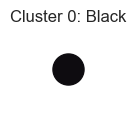

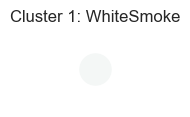

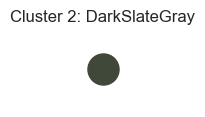

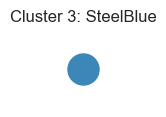

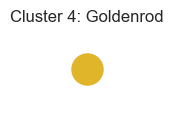

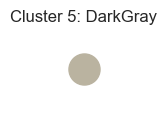

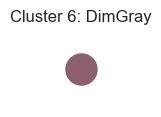

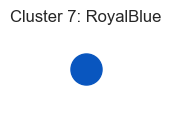

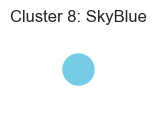

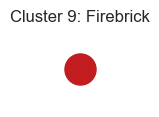

In [10]:
color_dict = get_closest_name_for_rgb(centroids)

def show_color(test_color, title):
  c = [ cc/255 for cc in test_color]  

  x = [1]
  y = [1]

  # plot a large dot
  fig = plt.figure(figsize=(1, 1))
  plt.scatter(x,y,color=c,s=500)
  plt.title(title)
  plt.axis('off')
  return(plt)

for cluster in range(n_clusters):
    show_color(centroids[cluster],f'Cluster {cluster}: {color_dict[cluster]}')